[[1353.3 1361.1 1369.5 1369.4 1380.2]
 [1359.2 1357.7 1370.5 1370.6 1370.6]
 [1357.6 1363.6 1373.4 1371.4 1377.9]
 [1351.2 1361.5 1371.6 1372.4 1369.8]
 [1361.6 1373.8 1371.  1371.9 1379.6]]



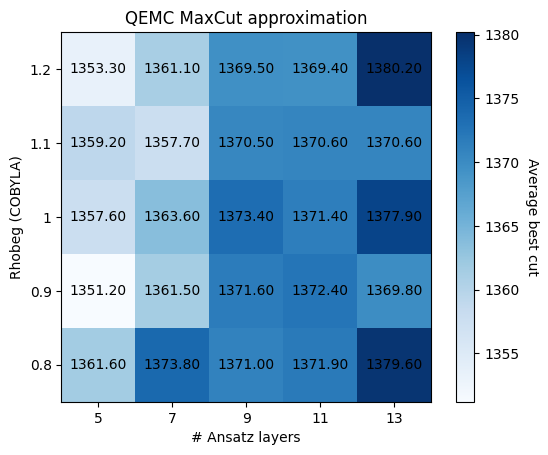

[[1766.6 1791.3 1798.8 1791.6 1792.8]
 [1771.7 1790.3 1803.2 1799.2 1809.5]
 [1773.  1789.4 1792.9 1791.1 1798.4]
 [1763.1 1787.5 1788.4 1793.8 1802.1]
 [1778.  1791.  1803.5 1788.9 1805.2]]



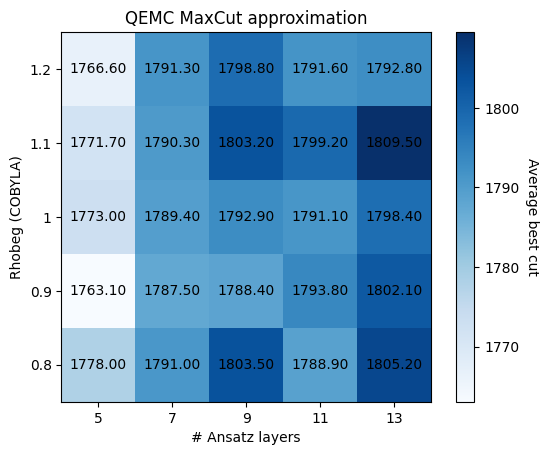

[[2179.2 2198.9 2205.1 2197.  2208.8]
 [2175.4 2194.1 2198.6 2200.6 2209.5]
 [2185.9 2188.6 2204.8 2214.9 2200. ]
 [2178.2 2191.7 2199.1 2201.8 2208.8]
 [2179.  2191.8 2196.9 2204.5 2210.5]]



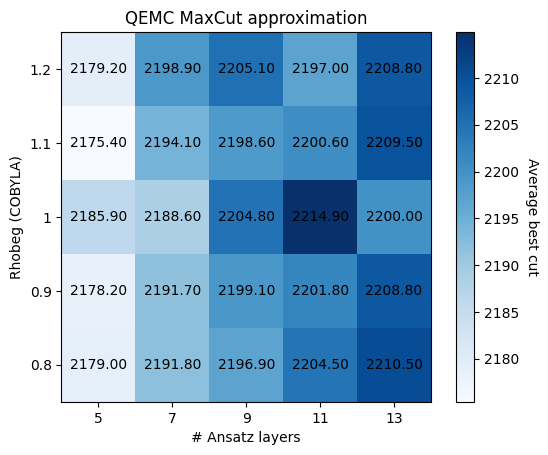

[[2585.2 2604.  2612.1 2611.3 2628.8]
 [2587.4 2604.7 2611.  2617.6 2621.7]
 [2589.  2605.3 2610.5 2615.9 2609.7]
 [2588.8 2602.5 2616.9 2618.  2619.6]
 [2588.8 2602.4 2611.5 2615.8 2616. ]]



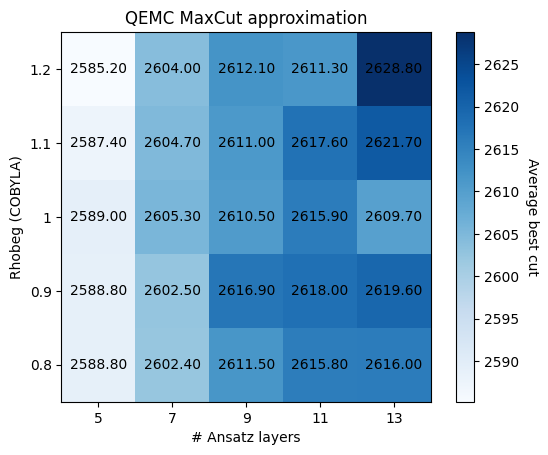

In [13]:
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt


NUM_LAYERS = [5, 7, 9, 11, 13]
RHOBEGS = [0.8, 0.9, 1, 1.1, 1.2]
LAYERS_DIM = len(NUM_LAYERS)
RHOBEGS_DIM = len(RHOBEGS)

cuts_data = np.zeros((RHOBEGS_DIM, LAYERS_DIM))

data_path = Path("C:/Users/levohad/ohad_work/qemc/EXP_DATA/ref_29_table3_comparison__iters_3000")

for curated_per_graph_data_path in data_path.rglob("total_backend_configurations_metadata.json"):
    
    with open(curated_per_graph_data_path, "r") as f:
        data = json.load(f)
          
    for configuration_id, configuration_data in data["configurations"].items():
        int_id = int(configuration_id) - 1
    
        num_layers = configuration_data["setting"]["num_layers"]
        layer_id =  int_id // LAYERS_DIM
        assert num_layers == NUM_LAYERS[layer_id]
        x_col_layer_id = layer_id
          
          
        rhobeg = configuration_data["setting"]["optimization_options"]["rhobeg"]
        rhobeg_id = int_id % RHOBEGS_DIM
        assert rhobeg == RHOBEGS[rhobeg_id]
        y_row_rhobeg_id = RHOBEGS_DIM - 1 - rhobeg_id
          
        cuts_data[y_row_rhobeg_id, x_col_layer_id] = configuration_data["average_best_cut"]
          
    print(cuts_data)
    print()
    
    # Create the plot
    fig, ax = plt.subplots()
    im = ax.imshow(cuts_data, cmap="Blues")

    # Create a colorbar to show the value scale
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Average best cut", rotation=-90, va="bottom")

    # Add the exact value as text on each tile
    for row_id in range(RHOBEGS_DIM):
        for col_id in range(LAYERS_DIM):

            cut = cuts_data[row_id, col_id]

            text = ax.text(
                col_id,
                row_id,
                f"{cut:.2f}",
                ha="center",
                va="center",
                color="black",
            )

    # Set labels and title
    ax.set_title("QEMC MaxCut approximation")
    ax.set_xticks(range(LAYERS_DIM), NUM_LAYERS)
    ax.set_yticks(range(RHOBEGS_DIM), reversed(RHOBEGS))
    ax.set_xlabel("# Ansatz layers")
    ax.set_ylabel("Rhobeg (COBYLA)")

    plt.show()